In [2]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris, fetch_openml
from sklearn.neighbors import KNeighborsClassifier, NearestCentroid
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression 
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression 
from sklearn.inspection import DecisionBoundaryDisplay
from sklearn.model_selection import GridSearchCV
from utils import mnist_reader
X_train, y_train = mnist_reader.load_mnist('data/fashion', kind='train')
X_test, y_test = mnist_reader.load_mnist('data/fashion', kind='t10k')
# Fix the random seed for reproducibility
# !! Important !! : do not change this
seed = 1234
np.random.seed(seed) 

In [3]:
X_tr, X_val, y_tr, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=seed, shuffle=True)

1
2
5
10
50
100
110


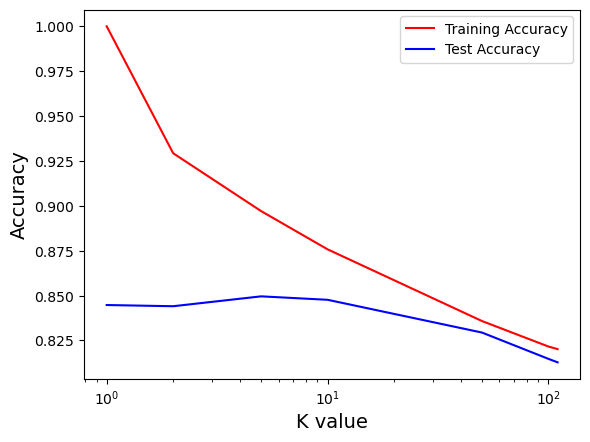

In [4]:
k = [1, 2, 5, 10, 50, 100, 110]

fig, axes = plt.subplots()
axes.set_xlabel('K value', fontsize=14)
axes.set_ylabel('Accuracy', fontsize=14)

train_acc = []
test_acc = []

for i in k:
    print(i)
    clf = KNeighborsClassifier(n_neighbors=i) 
    clf.fit(X_tr, y_tr)
    train_acc.append(clf.score(X_tr, y_tr))
    test_acc.append(clf.score(X_val, y_val))


axes.semilogx(k, train_acc, label='Training Accuracy', color='red') 
axes.semilogx(k, test_acc, label='Test Accuracy', color='blue')
leg = axes.legend()


In [7]:
weights = ['uniform', 'distance']
print("start")
for i in weights:
    clf = KNeighborsClassifier(weights=i) 
    clf.fit(X_tr, y_tr)

    print(f"Weight: {i}")
    print(f"Training Accuracy: {clf.score(X_tr, y_tr)}")
    print(f"Test Accuracy: {clf.score(X_val, y_val)}")


start
Weight: uniform
Training Accuracy: 0.8970833333333333
Test Accuracy: 0.8495833333333334
Weight: distance
Training Accuracy: 1.0
Test Accuracy: 0.8506666666666667


100
1000
5000
10000
20000
50000
60000


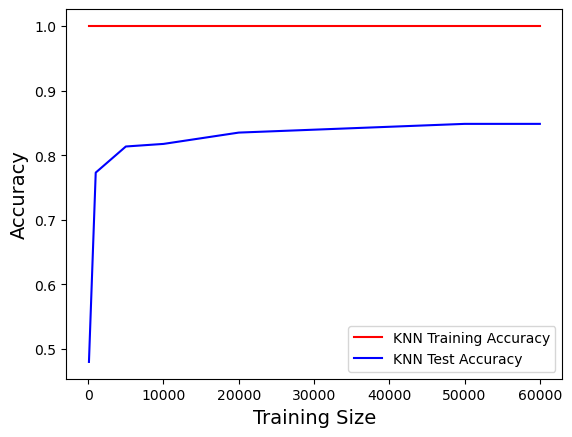

In [7]:

n_tr = [100, 1000, 5000, 10000, 20000, 50000, 60000]

train_acc = []
test_acc = []

for i in n_tr:
    print(i)
    clf = KNeighborsClassifier(n_neighbors=10, weights='distance') 

    clf.fit(X_tr[0:i], y_tr[0:i])
    train_acc.append(clf.score(X_tr[0:i], y_tr[0:i]))
    test_acc.append(clf.score(X_val[0:i], y_val[0:i]))


fig, axes = plt.subplots()
axes.set_xlabel('Training Size', fontsize=14)
axes.set_ylabel('Accuracy', fontsize=14)
axes.plot(n_tr, train_acc, label='KNN Training Accuracy', color='red')
axes.plot(n_tr, test_acc, label='KNN Test Accuracy', color='blue')

leg = axes.legend()

In [9]:
clf = KNeighborsClassifier(n_neighbors=10, weights='distance')
clf.fit(X_train, y_train)

print(f"Final Test Data Accuracy: {clf.score(X_test, y_test)}")

Final Test Data Accuracy: 0.8538
